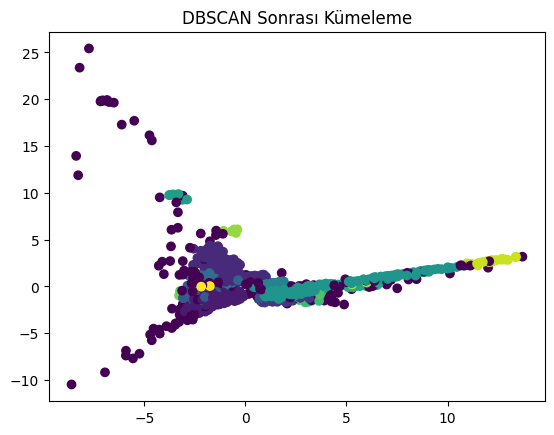

DBSCAN Sonuçları:
[[1829  171]
 [ 427   73]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2000
           1       0.30      0.15      0.20       500

    accuracy                           0.76      2500
   macro avg       0.55      0.53      0.53      2500
weighted avg       0.71      0.76      0.73      2500

Isolation Forest Sonuçları:
[[1629  371]
 [ 371  129]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2000
           1       0.26      0.26      0.26       500

    accuracy                           0.70      2500
   macro avg       0.54      0.54      0.54      2500
weighted avg       0.70      0.70      0.70      2500



In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import IsolationForest

# 1. Veri Setini Oku
df = pd.read_csv("/content/drive/MyDrive/UNSW_NB15_training-set.csv adlı dosyanın kopyası")

# 2. Önce normal ve saldırı örneklerini çek
normal = df[df['label'] == 0].sample(2000, random_state=42)
attack = df[df['label'] == 1].sample(500, random_state=42)

data = pd.concat([normal, attack])

# 3. Şimdi sadece sayısal kolonları al
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
X = data[numerical_features].drop(columns=['label'])  # 'label' da sayısal, onu çıkarıyoruz
y = data['label']

# 4. Eksik değerleri temizle
X = X.dropna()

# 5. StandardScaler ile ölçekle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. DBSCAN Uygulaması
dbscan = DBSCAN(eps=2.0, min_samples=5)
dbscan.fit(X_scaled)
dbscan_labels = dbscan.labels_

# 7. PCA ile 2D görselleştirme
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Sonrası Kümeleme')
plt.show()

# 8. DBSCAN sonuç analizi
dbscan_pred = [1 if label == -1 else 0 for label in dbscan_labels]

print("DBSCAN Sonuçları:")
print(confusion_matrix(y, dbscan_pred))
print(classification_report(y, dbscan_pred))

# 9. Isolation Forest Uygulaması
iso = IsolationForest(contamination=0.2, random_state=42)
iso.fit(X_scaled)
iso_labels = iso.predict(X_scaled)

iso_pred = [1 if label == -1 else 0 for label in iso_labels]

print("Isolation Forest Sonuçları:")
print(confusion_matrix(y, iso_pred))
print(classification_report(y, iso_pred))
